<p><font size="6"><b>Reshaping data</b></font></p>

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
excelample = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [3]:
excelample

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
4,February,Transportation,115.0
5,February,Grocery,240.0
6,February,Household,225.0
7,February,Entertainment,125.0
8,March,Transportation,90.0
9,March,Grocery,260.0


In [4]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


In [5]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [6]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

In [7]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [8]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [9]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [10]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


In [12]:
df = pd.read_csv("titanic.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
try:
    df.pivot(index='Sex', columns='Pclass', values='Fare')
except Exception as e:
    print("Exception!", e)

Exception! Index contains duplicate entries, cannot reshape


In [15]:
df.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,1,53.1000


In [16]:
df = pd.read_csv("titanic.csv")

In [17]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [18]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [19]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [20]:
pd.crosstab(index=df['Sex'], columns=df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [21]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


Text(0, 0.5, 'Survival ratio')

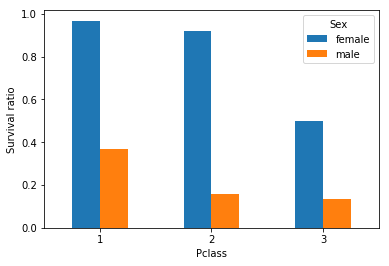

In [22]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Survival ratio')

In [23]:
df['Underaged'] = df['Age'] <= 18

In [24]:
df.pivot_table(index='Underaged', columns='Sex', 
               values='Fare', aggfunc='mean')

Sex,female,male
Underaged,,
False,46.612196,25.118081
True,36.765626,28.416023


In [25]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None

In [26]:
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


In [27]:
pd.melt(pivoted)

,variable,value
0,Sex,female
1,Sex,male
2,1,106.126
3,1,67.2261
4,2,21.9701
5,2,19.7418
6,3,16.1188
7,3,12.6616


In [28]:
pd.melt(pivoted, id_vars=['Sex']) #, var_name='Pclass', value_name='Fare')

,Sex,variable,value
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


In [29]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [30]:
df = df.set_index(['A', 'B']) # Indeed, you can combine two indices
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [31]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [32]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [34]:
df = pd.read_csv("titanic.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [37]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [38]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


In [39]:
pd.melt(pivoted, id_vars=['Sex'], var_name='Pclass', value_name='Fare')

,Sex,Pclass,Fare
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


In [40]:
temp = pivoted.set_index('Sex')
temp

,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [41]:
temp.columns.name = 'Pclass'
temp = temp.stack()
temp

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
dtype: float64

In [42]:
temp.reset_index(name='Fare')

,Sex,Pclass,Fare
0,female,1,106.125798
1,female,2,21.970121
2,female,3,16.118810
3,male,1,67.226127
4,male,2,19.741782
5,male,3,12.661633


In [43]:
# alternative: rename columns at the end
temp = pivoted.set_index('Sex').stack().reset_index()
temp.rename(columns={'level_1': 'Pclass', 0: 'Fare'})

,Sex,Pclass,Fare
0,female,1,106.125798
1,female,2,21.970121
2,female,3,16.118810
3,male,1,67.226127
4,male,2,19.741782
5,male,3,12.661633
